# Realizando a interpolação:

In [33]:
import numpy as np
import pandas as pd

def interpolar(
    path_in: str,
    path_out: str,
    x_start: float = 200.0,
    x_end: float = 3600.0,
    n_points: int = 3400,
    sep: str = "\t",
    decimal: str = ","
):
    df = pd.read_csv(path_in, sep=sep, header=None, names=["x", "y"], decimal=decimal)
    df = df.dropna().drop_duplicates(subset=["x"]).sort_values("x")
    x = df["x"].to_numpy()
    y = df["y"].to_numpy()
    x_new = np.linspace(x_start, x_end, n_points)
    y_new = np.interp(x_new, x, y)
    x_min, x_max = x[0], x[-1]
    m_left = (y[1] - y[0]) / (x[1] - x[0])
    m_right = (y[-1] - y[-2]) / (x[-1] - x[-2])
    mask_left = x_new < x_min
    mask_right = x_new > x_max
    y_new[mask_left] = y[0] + m_left * (x_new[mask_left] - x_min)
    y_new[mask_right] = y[-1] + m_right * (x_new[mask_right] - x_max)
    out = pd.DataFrame({"x": x_new, "y": y_new})
    out.to_csv(path_out, sep=sep, index=False, header=False, float_format="%.10f", decimal=decimal)


# Visualizando dados processados e brutos:

Observe que não há uma grande distorção. Então, podemos continuar utilizando a interpolação sem que o Raman Shift seja fortemente afetado.

Ps.: note que os pontos antes de 100 $cm^{-1}$ foram retirados por não serem de fato um pico, mas, sim, um ruído que tem origem de fótons Rayleigh por causa de um erro de calibração e da rejeição finita do filtro.

In [34]:
interpolar("data/raw/PE_glicol_mm4000.txt", "data/processed/PE_glicol_mm4000.txt")

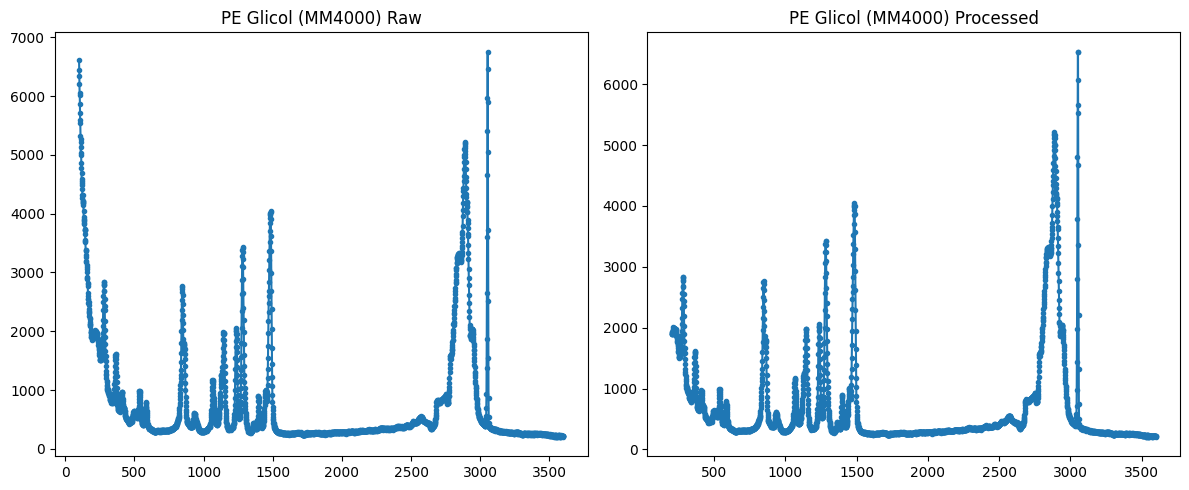

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("data/raw/PE_glicol_mm4000.txt", sep="\t", header=None, names=["x", "y"], decimal=",")
df2 = pd.read_csv("data/processed/PE_glicol_mm4000.txt", sep="\t", header=None, names=["x", "y"], decimal=",")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(df1["x"], df1["y"], "o-", markersize=3)
axs[0].set_title("PE Glicol (MM4000) Raw")
axs[1].plot(df2["x"], df2["y"], "o-", markersize=3)
axs[1].set_title("PE Glicol (MM4000) Processed")

plt.tight_layout()
plt.show()


# Agora sim...

In [36]:
interpolar("data/raw/PE_glicol_mm10000.txt", "data/processed/PE_glicol_mm10000.txt")
interpolar("data/raw/Policaprolactona.txt", "data/processed/Policaprolactona.txt")
interpolar("data/raw/Poliisopreno_trans_633nm.txt", "data/processed/Poliisopreno_trans_633nm.txt")
interpolar("data/raw/Poliisopreno_trans_785nm.txt", "data/processed/Poliisopreno_trans_785nm.txt")
interpolar("data/raw/Polivinil_pirrolidona.txt", "data/processed/Polivinil_pirrolidona.txt")